In [2]:
import rpy2.robjects as robjects
import numpy as np
from irf.ensemble import wrf
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from irf import irf_utils, irf_jupyter_utils

# Read data from R and transform to python object

In [3]:
tmp = robjects.r['load']('./iRF_analyses/data/enhancer.Rdata')
print(tmp)
X = robjects.r["X"]
XX = np.asarray(X)
print(XX)
assert(len(XX[0]) == X.ncol) #same number of cols
assert(len(XX) == X.nrow)
X = XX
Y = robjects.r["Y"]
Y = np.asarray(Y)
assert(len(Y) == len(X))
test = np.asarray(robjects.r["test.id"])
print(test)
train = np.asarray(robjects.r["train.id"])
varnames = np.asarray(robjects.r["varnames.all"])
print(varnames)

[1] "X"            "Y"            "test.id"      "train.id"     "varnames.all"

[[ 6.      10.      10.      ...  0.       0.       0.     ]
 [ 6.       7.       6.      ...  0.       0.       0.     ]
 [14.       9.      14.      ...  0.       0.       1.2013 ]
 ...
 [ 9.      12.      16.      ...  2.13176  2.22051  1.20134]
 [17.      18.      14.      ...  1.49709  1.39971  1.26398]
 [13.      15.      18.      ...  2.03769  2.03994  0.     ]]
[   1    5    7 ... 7804 7808 7809]
[['H3_c12' 'H3_c14a' 'H3_c14c' 'H3_c8' 'H3K18ac_c12' 'H3K18ac_c14a'
  'H3K18ac_c14c' 'H3K18ac_c8' 'H3K27ac_c12' 'H3K27ac_c14a' 'H3K27ac_c14c'
  'H3K27ac_c8' 'H3K27me3_c12' 'H3K27me3_c14a' 'H3K27me3_c14c'
  'H3K36me3_c12' 'H3K36me3_c14a' 'H3K36me3_c14c' 'H3K4me1_c12'
  'H3K4me1_c14a' 'H3K4me1_c14c' 'H3K4me1_c8' 'H3K4me3_c12' 'H3K4me3_c14a'
  'H3K4me3_c14c' 'H3K4me3_c8' 'H3K9ac_c12' 'H3K9ac_c14a' 'H3K9ac_c14c'
  'H3K9ac_c8' 'H4K5ac_c12' 'H4K5ac_c14a' 'H4K5ac_c14c' 'H4K5ac_c8'
  'H4K8ac_c12' 'H4K8ac_c14a' 'H4K

# split train test set

In [6]:
X_train = X[train-1,:]
X_test = X[test-1,:]
Y = np.random.permutation(Y)
y_train = Y[train - 1]
y_test = Y[test - 1]

# run irf 

In [7]:
all_rf_weights, all_K_iter_rf_data, \
all_rf_bootstrap_output, all_rit_bootstrap_output, \
stability_score = irf_utils.run_iRF(
    X_train,
    X_test,
    y_train,
    y_test,
    K = 4,
    n_estimators = 50,
    B=30,
    random_state_classifier=2018,
    propn_n_samples=1,
    bin_class_type=1,
    M=500,
    max_depth=5,
    noisy_split=False,
    num_splits=2,
    n_estimators_bootstrap=500)

/home/yu/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/yu/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/yu/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/yu/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/yu/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: 

(array([  9.,   0.,   0.,   0.,   1.,   0.,   1.,   1.,   1.,   4.,   6.,
          7.,   6.,   7.,  10.,   7.,  18.,  12.,  27.,  20.,  29.,  41.,
         31.,  52.,  63.,  61.,  67.,  94.,  93., 102., 134., 129., 140.,
        155., 170., 169., 152., 149., 151., 147., 179., 164., 127., 162.,
        127., 114., 107.,  92.,  91.,  71.,  68.,  60.,  42.,  44.,  35.,
         27.,  26.,  13.,  20.,  12.,  11.,   9.,  10.,   3.,   5.,   4.,
          1.,   1.,   6.,   3.,   1.,   1.,   3.,   0.,   0.,   1.,   2.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([ 0.   ,  0.775,  1.55 ,  2.325,  3.1  ,  3.875,  4.65 ,  5.425,
         6.2  ,  6.975,  7.75 ,  8.525,  9.3  , 10.075, 10.85 , 11.625,
        12.4  , 13.175, 13.95 , 14.725, 15.5  , 16.275, 17.05 , 17.825,
        18.6  , 19.375, 20.15 , 20.925, 21.7  , 22.475, 23.25 , 24.025,
        24.8  , 25.575, 26.35 

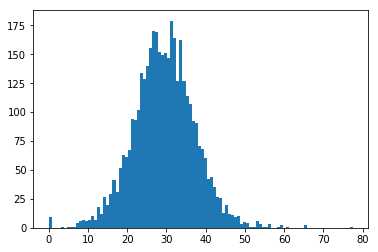

In [18]:
#tmp = varnames[1]
plt.hist(X_train[:, 42], bins=100)
#np.where(varnames[1] == 'wt_H3')

# plot results and their stability score

In [10]:
irf_jupyter_utils._get_histogram(stability_score, sort = True)

# map feature index to genes

In [9]:
for index, feature_interaction in enumerate(sorted(stability_score.items(), key=lambda k: -k[1])):
    print(index, feature_interaction[1], [varnames[1][int(ind)] for ind in feature_interaction[0].split('_')])

0 1.0 ['H3K18ac']
1 1.0 ['H3K27me3']
2 1.0 ['H3K4me3']
3 1.0 ['dl3']
4 1.0 ['H3K27me3']
5 1.0 ['H3K4me1']
6 1.0 ['H3K36me3']
7 1.0 ['wt_H3K18ac']
8 1.0 ['H3K36me3']
9 1.0 ['wt_H3K4me1']
10 1.0 ['H3K4me3']
11 1.0 ['wt_H3']
12 1.0 ['H3K27me3']
13 1.0 ['H4K5ac']
14 1.0 ['H3K4me1']
15 1.0 ['H3K18ac', 'wt_H3K4me1']
16 1.0 ['wt_ZLD']
17 1.0 ['H3K4me3']
18 1.0 ['H3K27ac']
19 1.0 ['H3K18ac']
20 1.0 ['H3K18ac']
21 1.0 ['H3K9ac']
22 1.0 ['input1']
23 0.9666666666666667 ['H3K27ac']
24 0.9666666666666667 ['input3']
25 0.9666666666666667 ['H3K18ac', 'H3K4me3']
26 0.9666666666666667 ['H3K18ac', 'H3K4me3']
27 0.9666666666666667 ['H3K9ac']
28 0.9666666666666667 ['H3K27me3', 'wt_H3K4me1']
29 0.9666666666666667 ['H3K18ac', 'H3K36me3']
30 0.9666666666666667 ['H3K27me3', 'H3K4me3']
31 0.9666666666666667 ['H3K18ac', 'wt_ZLD']
32 0.9666666666666667 ['H3K36me3']
33 0.9666666666666667 ['H3']
34 0.9666666666666667 ['H3K27me3', 'H3K36me3']
35 0.9333333333333333 ['H3K18ac', 'H3K36me3']
36 0.9333333333333333 ['H3

800 0.2 ['H3K36me3', 'wt_H3K4me1', 'dl3']
801 0.2 ['H3K4me3', 'wt_H3', 'dl3']
802 0.2 ['H3K27me3', 'H3K36me3', 'dl3']
803 0.2 ['H3K27me3', 'H3K4me3', 'H3K4me3']
804 0.2 ['H3', 'H3K27me3', 'H3K4me3']
805 0.2 ['H3K4me3', 'input1']
806 0.2 ['H3', 'H3K18ac', 'wt_ZLD']
807 0.16666666666666666 ['H3K4me1', 'H3K4me3', 'H3K4me3']
808 0.16666666666666666 ['H3K18ac', 'H3K4me3', 'wt_H3K4me1']
809 0.16666666666666666 ['H3K27me3', 'H3K4me1', 'wt_H3K18ac']
810 0.16666666666666666 ['H3', 'H3K18ac', 'H3K4me3']
811 0.16666666666666666 ['H3K27ac', 'H3K36me3', 'H3K4me3']
812 0.16666666666666666 ['H3K18ac', 'H3K36me3']
813 0.16666666666666666 ['H3K18ac', 'H3K27me3', 'H3K36me3', 'H3K36me3']
814 0.16666666666666666 ['H3K18ac', 'H3K4me1']
815 0.16666666666666666 ['H3K18ac', 'H3K18ac', 'wt_H3K18ac']
816 0.16666666666666666 ['H3', 'H3K18ac', 'H3K4me3']
817 0.16666666666666666 ['H3K36me3', 'H3K4me1', 'H3K4me3']
818 0.16666666666666666 ['H3K18ac', 'H3K27me3', 'H3K36me3', 'H3K4me1']
819 0.16666666666666666 ['H3K4m

1467 0.1 ['H3', 'H3K27me3', 'wt_H3']
1468 0.1 ['H3K18ac', 'H3K18ac', 'H3K27me3', 'H3K27me3']
1469 0.1 ['H3K18ac', 'H4K5ac', 'wt_H3']
1470 0.1 ['H3K18ac', 'H3K36me3', 'H3K36me3']
1471 0.1 ['H3K27me3', 'H3K27me3', 'wt_H3K18ac', 'wt_H3K4me1']
1472 0.1 ['H3', 'H3K36me3', 'wt_H3K4me1']
1473 0.1 ['H3', 'H3K27me3', 'wt_H3K18ac']
1474 0.1 ['H3K4me1', 'H4K5ac', 'wt_H3K4me1']
1475 0.1 ['H3K18ac', 'H3K18ac', 'H3K36me3']
1476 0.1 ['H3K27me3', 'H3K36me3', 'H3K4me3', 'wt_H3']
1477 0.1 ['H3', 'H3K18ac', 'H3K27me3']
1478 0.1 ['H3', 'H3K18ac']
1479 0.1 ['H4K5ac', 'wt_H3K18ac', 'wt_H3K4me1']
1480 0.1 ['H3', 'H3K27me3', 'H3K9ac']
1481 0.1 ['H3K4me1', 'H3K4me3', 'wt_H3K4me1', 'dl3']
1482 0.1 ['H3K18ac', 'H3K27me3', 'wt_H3K18ac']
1483 0.1 ['H3K18ac', 'H4K5ac']
1484 0.1 ['H3K18ac', 'H3K27me3', 'wt_H3K4me1']
1485 0.1 ['H3K18ac', 'wt_H3', 'wt_ZLD']
1486 0.1 ['H3K36me3', 'H3K9ac', 'wt_ZLD']
1487 0.1 ['H3', 'H3K27me3', 'H3K4me3']
1488 0.1 ['H3K9ac', 'wt_H3']
1489 0.1 ['H3K27me3', 'H3K9ac', 'wt_H3K4me1']
1490 0.

2300 0.06666666666666667 ['H3', 'H3K27me3', 'H3K4me1', 'wt_H3K18ac']
2301 0.06666666666666667 ['H3', 'twi']
2302 0.06666666666666667 ['H3K4me1', 'input3']
2303 0.06666666666666667 ['H3K18ac', 'H3K27me3', 'H3K36me3', 'input1']
2304 0.06666666666666667 ['H3K4me3', 'H3K9ac', 'input3', 'wt_ZLD']
2305 0.06666666666666667 ['H3K27me3', 'H3K36me3', 'H3K9ac']
2306 0.06666666666666667 ['H3K27me3', 'H3K36me3', 'H3K4me3', 'wt_ZLD']
2307 0.06666666666666667 ['H3K27ac', 'H3K27me3', 'input3']
2308 0.06666666666666667 ['H3', 'H3K27me3', 'H3K4me3']
2309 0.06666666666666667 ['H3K27me3', 'H3K4me3', 'wt_H3', 'wt_H3K4me1']
2310 0.06666666666666667 ['H3K27me3', 'H3K36me3', 'H3K4me3']
2311 0.06666666666666667 ['H3K18ac', 'H3K27me3', 'H3K27me3']
2312 0.06666666666666667 ['H3K27me3', 'H3K36me3', 'H3K9ac']
2313 0.06666666666666667 ['H3K18ac', 'input3', 'wt_H3', 'wt_H3K4me1']
2314 0.06666666666666667 ['H3', 'H3K27me3', 'H3K27me3', 'wt_H3']
2315 0.06666666666666667 ['H3K27ac', 'H3K27me3', 'H3K4me1']
2316 0.066666

3133 0.06666666666666667 ['H3K27ac', 'H3K36me3', 'wt_H3']
3134 0.06666666666666667 ['H3K36me3', 'H3K4me3', 'H4K5ac', 'wt_H3K4me1']
3135 0.06666666666666667 ['H3K18ac', 'H3K27me3', 'H3K36me3', 'wt_H3K4me1']
3136 0.06666666666666667 ['H3K36me3', 'H3K4me3', 'wt_ZLD']
3137 0.06666666666666667 ['H3K18ac', 'H3K36me3', 'H4K5ac']
3138 0.06666666666666667 ['H3K27me3', 'H3K36me3', 'H4K5ac']
3139 0.06666666666666667 ['H3K18ac', 'H3K36me3', 'H3K4me3', 'wt_H3']
3140 0.06666666666666667 ['H3', 'H3K36me3', 'H3K36me3']
3141 0.06666666666666667 ['H3K36me3', 'input1', 'wt_H3']
3142 0.06666666666666667 ['H3K4me1', 'H3K4me3', 'input1', 'wt_H3K4me1']
3143 0.06666666666666667 ['H3K18ac', 'H3K27ac', 'wt_ZLD']
3144 0.06666666666666667 ['H3K36me3', 'H3K36me3', 'H3K4me1']
3145 0.06666666666666667 ['H3K27me3', 'H3K4me3', 'H4K5ac', 'wt_H3K4me1']
3146 0.06666666666666667 ['H4K5ac', 'input2']
3147 0.06666666666666667 ['H3K27ac', 'H3K9ac']
3148 0.06666666666666667 ['H3', 'H3K18ac', 'wt_H3K18ac']
3149 0.0666666666666

3966 0.03333333333333333 ['H3K27me3', 'H3K27me3', 'H3K36me3', 'H3K36me3', 'wt_H3', 'wt_H3K4me1']
3967 0.03333333333333333 ['H3K27me3', 'H3K27me3', 'H3K36me3', 'H3K36me3', 'wt_H3']
3968 0.03333333333333333 ['H3K27me3', 'H3K27me3', 'H3K36me3', 'wt_H3']
3969 0.03333333333333333 ['H3K27ac', 'H3K27me3', 'H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H3K4me3', 'H3K9ac', 'H4K8ac', 'wt_ZLD']
3970 0.03333333333333333 ['H3K27ac', 'H3K27me3', 'H3K36me3', 'H3K4me1', 'wt_ZLD']
3971 0.03333333333333333 ['H3K18ac', 'H3K27me3', 'H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me1', 'H3K4me3', 'H3K9ac', 'H4K5ac']
3972 0.03333333333333333 ['H3', 'H3K18ac', 'H3K18ac', 'H3K27ac', 'H3K27me3', 'H3K27me3', 'H3K36me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H3K4me3', 'H3K4me3', 'H3K9ac', 'H4K5ac', 'wt_H3', 'wt_ZLD', 'da2']
3973 0.03333333333333333 ['H3K18ac', 'H3K27me3', 'H3K36me3', 'H3K4me3', 'H4K5ac', 'wt_H3', 'wt_ZLD']
3974 0.03333333333333333 ['H3K18ac', 'H3K27me3', 'H3K4me3', 'H3K4me3', 'H4K5ac', 'wt_H3K18ac']
3975 0

4633 0.03333333333333333 ['H3', 'H3K18ac', 'H3K18ac', 'H3K18ac', 'H3K27ac', 'H3K27ac', 'H3K27me3', 'H3K36me3', 'H3K4me3', 'H3K4me3', 'input3', 'wt_H3K18ac', 'wt_H3K4me1', 'wt_ZLD', 'dl3', 'mad2']
4634 0.03333333333333333 ['H3K18ac', 'H3K18ac', 'H3K27me3', 'H3K4me3', 'input3', 'wt_H3K18ac']
4635 0.03333333333333333 ['H3K18ac', 'H3K18ac', 'H3K27ac', 'H3K36me3', 'mad2']
4636 0.03333333333333333 ['H3', 'H3K18ac', 'H3K27ac', 'H3K27ac', 'H3K27me3', 'H3K27me3', 'H3K36me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H3K4me3', 'H4K5ac', 'H4K8ac', 'input3', 'input4', 'wt_H3', 'wt_H3K18ac', 'wt_ZLD', 'dl3', 'twi']
4637 0.03333333333333333 ['H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H4K8ac', 'wt_H3', 'wt_ZLD']
4638 0.03333333333333333 ['H3K27me3', 'H3K4me1', 'H3K4me3', 'H3K4me3', 'wt_ZLD']
4639 0.03333333333333333 ['H3K27me3', 'H3K4me1', 'H3K4me3', 'wt_ZLD']
4640 0.03333333333333333 ['H3', 'H3K27me3', 'H3K27me3', 'H3K4me1', 'H3K4me1', 'H3K9ac', 'H4K5ac', 'wt_H3K4me1', 'wt_ZLD', 'dl3']
4641 0.033333333

5466 0.03333333333333333 ['H3K27me3', 'H3K4me3', 'wt_H3K18ac', 'wt_H3K4me1', 'twi']
5467 0.03333333333333333 ['H3', 'H3', 'H3', 'H3', 'H3K18ac', 'H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me1', 'H3K4me1', 'H3K4me3', 'H4K5ac', 'input2', 'wt_H3', 'wt_H3K4me1', 'wt_ZLD', 'twi', 'twi']
5468 0.03333333333333333 ['input2', 'twi']
5469 0.03333333333333333 ['H3K18ac', 'H3K18ac', 'H3K27ac', 'H3K27me3', 'H3K4me1', 'H3K4me3', 'H3K4me3', 'H3K9ac', 'wt_H3K18ac']
5470 0.03333333333333333 ['H3K27me3', 'H3K4me1', 'H4K5ac', 'wt_H3', 'wt_H3K18ac', 'wt_H3K4me1', 'dl3', 'prdFQ']
5471 0.03333333333333333 ['H3', 'H3', 'H3K27ac', 'H3K27ac', 'H3K27me3', 'H3K27me3', 'H3K36me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H3K4me3', 'H3K4me3', 'H3K4me3', 'H4K5ac', 'wt_H3K18ac', 'wt_H3K4me1', 'wt_ZLD']
5472 0.03333333333333333 ['H3K27ac', 'H3K27me3', 'H3K36me3', 'H3K4me3', 'H3K9ac', 'input2', 'wt_H3K18ac', 'wt_H3K4me1', 'wt_ZLD', 'dl3']
5473 0.03333333333333333 ['H3K4me3', 'input2', 'wt_ZLD']
5474 0.03333333333333333 ['H3K27

6132 0.03333333333333333 ['H3K4me1', 'H3K4me3', 'H3K9ac']
6133 0.03333333333333333 ['H3K18ac', 'H3K18ac', 'H3K27ac', 'H3K27me3', 'H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K9ac', 'input1', 'wt_H3']
6134 0.03333333333333333 ['H3K27ac', 'H3K27me3', 'H3K27me3', 'H3K36me3', 'H3K4me3', 'H3K4me3', 'H3K9ac', 'H4K5ac', 'H4K8ac', 'input1', 'wt_H3', 'wt_H3K18ac']
6135 0.03333333333333333 ['H3K27me3', 'H3K27me3', 'H4K8ac']
6136 0.03333333333333333 ['H3K27me3', 'H3K36me3', 'H3K4me3', 'H3K4me3']
6137 0.03333333333333333 ['H3', 'H3K27ac', 'H3K27me3', 'H3K36me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H3K4me3', 'H3K9ac', 'input1', 'wt_H3K18ac']
6138 0.03333333333333333 ['H3K27ac', 'H3K36me3', 'H3K4me3', 'wt_H3K18ac']
6139 0.03333333333333333 ['H3K18ac', 'H3K18ac', 'H3K18ac', 'H3K27ac', 'H3K27me3', 'H3K27me3', 'H3K27me3', 'H3K36me3', 'H3K36me3', 'H3K36me3', 'H3K4me3', 'H3K4me3', 'H3K9ac', 'input1', 'input2', 'input3', 'wt_H3', 'wt_H3K4me1', 'wt_ZLD', 'da2', 'sna']
6140 0.03333333333333333 ['H3K18ac', 'H3K27me3

6799 0.03333333333333333 ['H3K18ac', 'H3K27ac', 'H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H3K9ac', 'H4K5ac', 'H4K8ac', 'input1', 'wt_H3']
6800 0.03333333333333333 ['H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H3K9ac', 'H4K5ac', 'input1', 'wt_H3']
6801 0.03333333333333333 ['H3K18ac', 'H3K18ac', 'H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'input2', 'wt_H3']
6802 0.03333333333333333 ['H3K18ac', 'H3K18ac', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'wt_H3']
6803 0.03333333333333333 ['H3K18ac', 'H3K36me3', 'H3K4me1', 'H3K4me1', 'H3K4me3', 'H4K5ac', 'twi']
6804 0.03333333333333333 ['H3', 'H3K18ac', 'H3K18ac', 'H3K36me3', 'H3K9ac']
6805 0.03333333333333333 ['H3', 'H3', 'H3K18ac', 'H3K27ac', 'H3K27me3', 'H3K4me3', 'H3K9ac', 'wt_H3', 'wt_H3K4me1', 'run']
6806 0.03333333333333333 ['H3', 'H3K18ac', 'H3K27ac', 'H3K9ac']
6807 0.03333333333333333 ['H3K27ac', 'H3K4me1', 'H3K4me1', 'H3K4me1', 'H3K4me3', 'H4K5ac', 'wt_H3', 'wt_H3K4me1', 'twi']
6808 0.03333333333333333 ['H3K4me1', 'H3K4me1', 'H3K4me3', 

7632 0.03333333333333333 ['H3', 'H3', 'H3', 'H3K18ac', 'H3K27me3', 'H3K36me3', 'H4K5ac', 'H4K8ac', 'input1', 'dl3', 'twi']
7633 0.03333333333333333 ['H3', 'H3K18ac', 'H3K18ac', 'H3K27ac', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H3K4me3', 'H3K9ac', 'H3K9ac', 'H4K5ac', 'da2', 'kr']
7634 0.03333333333333333 ['H3K18ac', 'H3K27ac', 'H3K36me3', 'H3K4me3', 'H3K9ac', 'H3K9ac']
7635 0.03333333333333333 ['H3K18ac', 'H3K4me3', 'H3K4me3', 'H3K9ac']
7636 0.03333333333333333 ['H3K18ac', 'H3K4me3', 'H3K4me3']
7637 0.03333333333333333 ['H3K18ac', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H4K8ac', 'wt_H3K18ac']
7638 0.03333333333333333 ['H3K18ac', 'H3K27me3', 'H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me1', 'H3K4me3', 'H3K4me3', 'H4K5ac', 'H4K5ac', 'H4K8ac', 'input1', 'wt_ZLD']
7639 0.03333333333333333 ['H3K18ac', 'H3K27me3', 'H4K8ac', 'wt_ZLD']
7640 0.03333333333333333 ['H3', 'H3K18ac', 'H3K27ac', 'H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me1', 'H3K4me3', 'H3K4me3', 'H3K4me3', 'H3K9ac', 'H4K8ac', 'wt_H3']
7641 0.03333

8465 0.03333333333333333 ['H3', 'H3K18ac', 'H3K27me3', 'H3K36me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H3K9ac', 'wt_H3', 'wt_H3K18ac', 'wt_ZLD']
8466 0.03333333333333333 ['H3K18ac', 'H3K4me1', 'wt_H3K18ac', 'wt_ZLD']
8467 0.03333333333333333 ['H3', 'H3K18ac', 'H3K18ac', 'H3K18ac', 'H3K27me3', 'H3K27me3', 'H3K36me3', 'H3K4me3', 'wt_H3K18ac', 'wt_ZLD', 'kr', 'prdFQ']
8468 0.03333333333333333 ['H3', 'H3K27ac', 'H3K27me3', 'H3K27me3', 'H3K36me3', 'H3K36me3', 'H3K4me1', 'H3K4me1', 'H3K4me3', 'H3K4me3', 'H3K9ac', 'H3K9ac', 'H4K5ac', 'input3', 'wt_H3', 'wt_H3K18ac', 'wt_ZLD', 'dl3']
8469 0.03333333333333333 ['H3', 'H3K27ac', 'H3K27me3', 'H3K36me3', 'H3K4me1', 'wt_H3K18ac', 'wt_ZLD', 'dl3']
8470 0.03333333333333333 ['H3K27ac', 'H3K27me3', 'H3K4me1', 'H3K4me1', 'H3K9ac', 'H4K5ac', 'wt_H3K18ac', 'wt_ZLD', 'dl3']
8471 0.03333333333333333 ['H3K27ac', 'H3K27me3', 'wt_ZLD', 'dl3']
8472 0.03333333333333333 ['H3K27ac', 'H3K27me3', 'H3K4me1', 'H3K4me1', 'H3K9ac', 'wt_H3K18ac', 'dl3']
8473 0.033333333333

9223 0.03333333333333333 ['H3K18ac', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H4K5ac', 'input1']
9224 0.03333333333333333 ['H3', 'H3K18ac', 'H3K18ac', 'H3K18ac', 'H3K27me3', 'H3K27me3', 'H3K36me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H3K9ac', 'H3K9ac', 'H4K5ac', 'input2', 'wt_H3']
9225 0.03333333333333333 ['H3K18ac', 'H3K18ac', 'H3K27me3', 'H3K36me3', 'H4K5ac']
9226 0.03333333333333333 ['H3K18ac', 'H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H3K9ac', 'H3K9ac', 'H4K5ac', 'H4K5ac', 'input3', 'wt_H3', 'wt_H3K4me1', 'run']
9227 0.03333333333333333 ['H3K4me1', 'H3K9ac', 'wt_H3', 'wt_H3K4me1']
9228 0.03333333333333333 ['H3K18ac', 'H3K4me3', 'wt_H3', 'wt_H3K4me1', 'run']
9229 0.03333333333333333 ['H3', 'H3', 'H3', 'H3K18ac', 'H3K18ac', 'H3K27ac', 'H3K27me3', 'H3K36me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H3K4me3', 'H3K9ac', 'H4K5ac', 'input2', 'wt_H3', 'wt_H3K4me1', 'dl3']
9230 0.03333333333333333 ['H3K18ac', 'H3K18ac', 'H3K27ac', 'H3K36me3', 'H3K4me3', 'wt_H3', 'dl3']
9231 0.03333333333333333 ['H

9965 0.03333333333333333 ['H3K18ac', 'H3K27me3', 'H4K8ac', 'input3']
9966 0.03333333333333333 ['H3K18ac', 'H3K18ac', 'H3K27me3', 'H3K36me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H3K4me3', 'H3K9ac', 'H4K8ac', 'input1']
9967 0.03333333333333333 ['H3K18ac', 'H3K18ac', 'H3K36me3', 'H3K9ac']
9968 0.03333333333333333 ['H3K18ac', 'H3K27ac', 'H3K27me3', 'H3K27me3', 'H3K27me3', 'H3K36me3', 'H3K36me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H3K4me3', 'H3K9ac', 'H4K5ac', 'wt_H3']
9969 0.03333333333333333 ['H3K27me3', 'H3K27me3', 'H3K27me3', 'H3K36me3', 'H3K4me3', 'H3K9ac', 'H4K5ac', 'wt_H3']
9970 0.03333333333333333 ['H3K27me3', 'H3K36me3', 'H3K9ac', 'H4K5ac', 'wt_H3']
9971 0.03333333333333333 ['H3K36me3', 'H4K5ac', 'wt_H3']
9972 0.03333333333333333 ['H3', 'H3K18ac', 'H3K18ac', 'H3K27me3', 'H3K36me3', 'H3K36me3', 'H3K4me3', 'H3K4me3', 'H3K4me3', 'H3K9ac', 'H3K9ac', 'wt_H3', 'dl3']
9973 0.03333333333333333 ['H3', 'H3K36me3', 'H3K4me3', 'H3K4me3', 'wt_H3']
9974 0.03333333333333333 ['H3K18ac', 'H3K36me3',

10631 0.03333333333333333 ['H3K18ac', 'H3K27me3', 'H3K36me3', 'H4K5ac']
10632 0.03333333333333333 ['H3K18ac', 'H3K18ac', 'H3K27ac', 'H3K27me3', 'H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H4K5ac', 'dl3']
10633 0.03333333333333333 ['H3K18ac', 'H3K18ac', 'H3K27me3', 'H3K27me3', 'H3K36me3', 'H3K4me3', 'H3K4me3', 'H3K9ac', 'wt_H3K4me1', 'sna']
10634 0.03333333333333333 ['H3K18ac', 'H3K4me3', 'H3K4me3', 'H3K9ac', 'wt_H3K4me1']
10635 0.03333333333333333 ['H3K18ac', 'H3K27me3', 'H3K36me3', 'H3K4me3', 'H3K9ac', 'H4K5ac', 'input1', 'wt_ZLD']
10636 0.03333333333333333 ['H3K18ac', 'H3K27me3', 'H3K27me3', 'H3K36me3', 'H3K4me3', 'H4K5ac', 'input4', 'wt_H3', 'wt_H3K18ac', 'wt_H3K4me1', 'wt_ZLD', 'dl3']
10637 0.03333333333333333 ['H3', 'H3K18ac', 'H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H3K9ac', 'H4K5ac', 'input1', 'wt_H3K4me1', 'da2', 'dl3', 'z2']
10638 0.03333333333333333 ['H3', 'H3K27me3', 'input1', 'da2']
10639 0.03333333333333333 ['H3K18ac', 'H3K27me3', 'H3K4me3', 'H3K4me3', 'H3K9ac', '

11131 0.03333333333333333 ['H3K27me3', 'H3K4me3', 'input3', 'wt_H3', 'wt_H3K4me1', 'twi']
11132 0.03333333333333333 ['H3K18ac', 'H3K18ac', 'H3K18ac', 'H3K27ac', 'H3K27ac', 'H3K27me3', 'H3K27me3', 'H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H3K9ac', 'H4K5ac', 'wt_H3K18ac', 'wt_H3K4me1', 'wt_ZLD', 'bcd', 'twi']
11133 0.03333333333333333 ['H3K18ac', 'H3K9ac', 'twi']
11134 0.03333333333333333 ['H3K18ac', 'twi']
11135 0.03333333333333333 ['H3K18ac', 'H3K18ac', 'H3K36me3', 'H3K4me1', 'wt_H3K4me1']
11136 0.03333333333333333 ['H3', 'H3K18ac', 'H3K36me3', 'H3K4me3', 'H4K5ac', 'input4', 'wt_H3', 'wt_H3K18ac', 'wt_H3K4me1', 'wt_ZLD', 'dl3']
11137 0.03333333333333333 ['H3K18ac', 'H3K4me3', 'wt_H3', 'wt_H3K4me1', 'wt_ZLD']
11138 0.03333333333333333 ['H3K36me3', 'H3K4me3', 'wt_H3K4me1', 'wt_ZLD']
11139 0.03333333333333333 ['H3K18ac', 'H3K27me3', 'H3K27me3', 'H3K36me3', 'H3K36me3', 'H3K36me3', 'H3K4me1', 'H3K4me1', 'H4K5ac', 'H4K5ac', 'H4K8ac', 'twi']
11140 0.03333333333333333 ['H3K18ac', 'H3K18ac

11761 0.03333333333333333 ['H3K18ac', 'H3K27ac', 'H3K27me3', 'H3K4me3', 'H4K5ac', 'H4K8ac', 'input1', 'input3', 'wt_H3K4me1', 'hb']
11762 0.03333333333333333 ['H3K18ac', 'H3K27me3', 'H4K5ac', 'input3']
11763 0.03333333333333333 ['H3', 'H3', 'H3K18ac', 'H3K18ac', 'H3K18ac', 'H3K27me3', 'H3K27me3', 'H3K27me3', 'H3K36me3', 'H3K4me3', 'H4K8ac', 'input1', 'wt_H3', 'wt_H3K18ac', 'wt_ZLD', 'D1', 'dl3', 'kr']
11764 0.03333333333333333 ['H3', 'H3K18ac', 'H3K18ac', 'H3K18ac', 'H3K27me3', 'H3K27me3', 'H3K36me3', 'H4K8ac', 'input1', 'wt_H3K18ac', 'wt_ZLD', 'dl3']
11765 0.03333333333333333 ['H3K18ac', 'H3K18ac', 'H3K27me3', 'H3K27me3', 'dl3']
11766 0.03333333333333333 ['H3K18ac', 'H3K18ac', 'H3K27me3', 'H3K27me3', 'H3K36me3', 'input1', 'wt_H3', 'dl3']
11767 0.03333333333333333 ['H3K18ac', 'H3K18ac', 'H3K27ac', 'H3K27me3', 'H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H3K4me3', 'H3K9ac', 'H4K8ac', 'input1', 'input3', 'wt_H3K4me1', 'wt_ZLD', 'dl3', 'twi']
11768 0.03333333333333333 ['H3K18ac', 'H3K27

12396 0.03333333333333333 ['H3K27me3', 'H3K4me3', 'H4K5ac', 'H4K5ac', 'wt_H3', 'wt_ZLD', 'dl3', 'twi']
12397 0.03333333333333333 ['H3K27me3', 'H4K5ac', 'H4K5ac', 'dl3']
12398 0.03333333333333333 ['H3', 'H3', 'H3K18ac', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H3K4me3', 'H4K5ac', 'H4K5ac', 'input1', 'input3', 'wt_H3', 'dl3', 'twi']
12399 0.03333333333333333 ['H3K18ac', 'H3K4me3', 'H4K5ac', 'input1', 'dl3', 'twi']
12400 0.03333333333333333 ['H3K18ac', 'H3K4me3', 'input1', 'dl3']
12401 0.03333333333333333 ['H3K18ac', 'H3K18ac', 'H3K27ac', 'H3K36me3', 'H3K9ac', 'dl3']
12402 0.03333333333333333 ['H3K27ac', 'H3K27ac', 'H3K36me3', 'H3K4me3', 'H3K9ac', 'input2', 'wt_H3K18ac', 'dl3']
12403 0.03333333333333333 ['H3K36me3', 'H3K9ac', 'wt_H3K18ac']
12404 0.03333333333333333 ['input2', 'wt_H3K18ac', 'dl3']
12405 0.03333333333333333 ['H3K18ac', 'H3K27me3', 'H3K4me3', 'H4K5ac', 'H4K5ac', 'H4K5ac', 'wt_ZLD', 'twi']
12406 0.03333333333333333 ['H3K18ac', 'H3K18ac', 'H3K27ac', 'H3K36me3', 'H3K4me3', 'H3K9ac', 

13131 0.03333333333333333 ['H3', 'H3', 'H3K27me3', 'H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me1', 'H3K4me3', 'H3K9ac', 'H4K5ac', 'wt_H3', 'wt_H3K18ac', 'wt_H3K4me1', 'da2', 'prdFQ']
13132 0.03333333333333333 ['H3K27me3', 'H3K4me1', 'H4K5ac']
13133 0.03333333333333333 ['H3', 'H3K18ac', 'H3K18ac', 'H3K27ac', 'H3K27me3', 'H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'input2', 'input3', 'input4', 'wt_ZLD']
13134 0.03333333333333333 ['H3K18ac', 'H3K27me3', 'H3K4me1', 'input3']
13135 0.03333333333333333 ['H3K18ac', 'H3K4me1', 'H3K4me3', 'input3', 'wt_ZLD']
13136 0.03333333333333333 ['H3', 'H3K27me3', 'H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me1', 'H3K4me1', 'H3K4me3', 'H3K9ac', 'H4K8ac', 'wt_ZLD', 'dl3']
13137 0.03333333333333333 ['H3K27me3', 'H3K27me3', 'H3K4me1', 'H3K4me1', 'H4K8ac', 'wt_ZLD']
13138 0.03333333333333333 ['H3', 'H3K27me3', 'H3K36me3', 'H3K4me1', 'wt_ZLD', 'dl3']
13139 0.03333333333333333 ['H3K36me3', 'H3K4me1', 'input3', 'dl3']
13140 0.03333333333333333 ['H3', 'H3K18ac', 'H3K2

13964 0.03333333333333333 ['H3K18ac', 'H3K27me3', 'H3K4me1', 'H4K5ac']
13965 0.03333333333333333 ['H3K18ac', 'H3K27me3', 'H3K4me3', 'H4K5ac']
13966 0.03333333333333333 ['H3K18ac', 'H3K18ac', 'H3K18ac', 'H3K27me3', 'H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H3K4me3', 'H3K9ac', 'H4K5ac', 'wt_H3K18ac', 'twi']
13967 0.03333333333333333 ['H3K18ac', 'H3K18ac', 'H3K27me3', 'H3K36me3', 'H3K4me3']
13968 0.03333333333333333 ['H3K18ac', 'H3K18ac', 'H3K27me3', 'H3K4me1', 'H3K4me3', 'H4K5ac']
13969 0.03333333333333333 ['H3', 'H3', 'H3K18ac', 'H3K18ac', 'H3K18ac', 'H3K27me3', 'H3K36me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H3K4me3', 'H3K9ac', 'input3', 'da2', 'dl3', 'prdBQ', 'slp']
13970 0.03333333333333333 ['H3', 'H3K18ac', 'H3K18ac', 'H3K27me3', 'H3K36me3', 'H3K4me3', 'H3K9ac', 'input3']
13971 0.03333333333333333 ['H3', 'H3K18ac', 'H3K18ac', 'H3K36me3']
13972 0.03333333333333333 ['H3', 'H3', 'H3K18ac', 'H3K18ac', 'H3K36me3', 'H3K4me3', 'H3K4me3', 'dl3']
13973 0.03333333333333333 ['H3K27ac', 'H3

14729 0.03333333333333333 ['H3', 'H3K18ac', 'H3K18ac', 'H3K27me3', 'H3K36me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H3K9ac', 'H4K8ac', 'wt_H3K18ac', 'wt_H3K4me1', 'wt_ZLD', 'dl3', 'h', 'mad2']
14730 0.03333333333333333 ['H3K18ac', 'H3K18ac', 'H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'dl3']
14731 0.03333333333333333 ['H3', 'H3', 'H3K18ac', 'H3K18ac', 'H3K27ac', 'H3K27ac', 'H3K27me3', 'H3K36me3', 'H3K36me3', 'H3K4me3', 'H3K9ac', 'H4K5ac', 'wt_H3K18ac', 'wt_H3K4me1', 'dl3', 'h', 'kr', 'twi']
14732 0.03333333333333333 ['H3', 'H3K18ac', 'H3K36me3', 'wt_H3K18ac', 'h', 'twi']
14733 0.03333333333333333 ['H3', 'H3K18ac', 'H3K36me3', 'twi']
14734 0.03333333333333333 ['H3', 'H3', 'H3', 'H3K18ac', 'H3K18ac', 'H3K27ac', 'H3K27me3', 'H3K27me3', 'H3K4me1', 'H3K4me3', 'H4K5ac', 'wt_H3K4me1', 'wt_ZLD']
14735 0.03333333333333333 ['H3', 'H3', 'H3K18ac', 'H3K18ac', 'H3K27ac', 'H3K27me3', 'H3K4me1', 'H3K9ac', 'H4K8ac', 'wt_H3', 'wt_H3K4me1', 'wt_ZLD', 'dl3']
14736 0.03333333333333333 ['H3K27ac', 'H3K4me1

15630 0.03333333333333333 ['H3K18ac', 'H3K27me3', 'H3K4me1', 'H3K4me3', 'H3K4me3', 'H3K9ac', 'input3', 'wt_H3K4me1']
15631 0.03333333333333333 ['H3', 'H3K18ac', 'H3K18ac', 'H3K27ac', 'H3K27me3', 'H3K27me3', 'H3K4me1', 'H3K9ac', 'dl3']
15632 0.03333333333333333 ['H3', 'H3K18ac', 'H3K18ac', 'H3K27ac', 'H3K27me3', 'H3K36me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H3K4me3', 'H3K4me3', 'H3K4me3', 'H3K9ac', 'H4K5ac', 'H4K8ac', 'dl3', 'run']
15633 0.03333333333333333 ['H3K18ac', 'H3K27ac', 'H3K36me3', 'H3K4me3', 'H3K4me3']
15634 0.03333333333333333 ['H3K27ac', 'H3K27me3', 'H3K36me3', 'H3K4me3', 'H3K4me3', 'H3K4me3', 'H4K8ac', 'dl3']
15635 0.03333333333333333 ['H3', 'H3K18ac', 'H3K18ac', 'H3K27me3', 'H3K27me3', 'H3K36me3', 'H3K9ac', 'input1', 'D1', 'dl3']
15636 0.03333333333333333 ['H3K18ac', 'H3K18ac', 'H3K4me1', 'H3K4me3', 'H3K4me3', 'H3K9ac', 'H3K9ac', 'wt_H3K18ac']
15637 0.03333333333333333 ['H3K18ac', 'H3K18ac', 'H3K18ac', 'H3K27ac', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H4K5ac', 'input1']
1563

16463 0.03333333333333333 ['H3', 'H3K18ac', 'H3K36me3', 'H3K36me3', 'wt_H3K4me1']
16464 0.03333333333333333 ['H3K18ac', 'H3K18ac', 'H3K18ac', 'H3K27me3', 'H3K4me1', 'H3K4me3', 'H3K4me3', 'H4K5ac', 'input1', 'input3']
16465 0.03333333333333333 ['H3', 'H3', 'H3K18ac', 'H3K27ac', 'H3K27me3', 'H3K4me1', 'H3K4me3', 'H3K4me3', 'H4K5ac', 'wt_ZLD']
16466 0.03333333333333333 ['H3K18ac', 'H3K27ac', 'H3K27me3', 'H3K4me3']
16467 0.03333333333333333 ['H3', 'H3K18ac', 'H3K18ac', 'H3K18ac', 'H3K27me3', 'H3K27me3', 'H3K36me3', 'H3K36me3', 'H3K4me1', 'H3K4me1', 'H3K4me1', 'H3K4me3', 'H3K4me3', 'H3K9ac', 'H4K5ac', 'H4K8ac', 'input1', 'input2', 'input4', 'wt_H3K4me1']
16468 0.03333333333333333 ['H3K27me3', 'H3K4me3', 'H3K4me3', 'input1']
16469 0.03333333333333333 ['H3K18ac', 'H3K27me3', 'H3K36me3', 'H3K4me1']
16470 0.03333333333333333 ['H3', 'H3K18ac', 'H3K18ac', 'H3K27me3', 'H3K27me3', 'H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'input1', 'wt_H3', 'wt_ZLD', 'D1']
16471 0.03333333333333333 ['H3K18ac', 

17130 0.03333333333333333 ['H3', 'H3', 'H3K18ac', 'H3K27me3', 'H3K36me3']
17131 0.03333333333333333 ['H3', 'H3', 'H3K18ac', 'H3K36me3']
17132 0.03333333333333333 ['H3K18ac', 'H4K8ac', 'wt_H3K18ac']
17133 0.03333333333333333 ['H3K4me3', 'H3K4me3', 'H3K9ac', 'input3', 'wt_H3K4me1', 'dl3']
17134 0.03333333333333333 ['H3K18ac', 'H3K18ac', 'H3K27me3', 'H3K36me3', 'H3K4me3', 'H3K4me3', 'H3K4me3', 'H3K9ac', 'H4K5ac', 'wt_ZLD']
17135 0.03333333333333333 ['H3K18ac', 'H3K4me3', 'H3K4me3', 'wt_ZLD']
17136 0.03333333333333333 ['H3K27me3', 'H3K36me3', 'H3K4me3', 'H3K4me3', 'H3K9ac']
17137 0.03333333333333333 ['H3K4me3', 'H3K4me3', 'H3K9ac']
17138 0.03333333333333333 ['H3', 'H3', 'H3K18ac', 'H3K18ac', 'H3K18ac', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H3K4me3', 'H3K9ac', 'H4K5ac', 'wt_H3', 'wt_ZLD', 'twi']
17139 0.03333333333333333 ['H3K18ac', 'H3K27me3', 'H3K36me3', 'H3K4me3', 'input3', 'wt_H3K18ac', 'wt_H3K4me1', 'dl3']
17140 0.03333333333333333 ['H3K18ac', 'H3K18ac', 'H3K36me3', 'H3K36me3', 'H4K8ac', 

17963 0.03333333333333333 ['H3K18ac', 'H3K27me3', 'H3K36me3', 'H3K4me3', 'input3']
17964 0.03333333333333333 ['H3K18ac', 'H3K18ac', 'H3K27ac', 'H3K36me3', 'H3K36me3', 'H3K4me3', 'wt_H3K18ac', 'wt_H3K4me1', 'wt_ZLD', 'dl3']
17965 0.03333333333333333 ['H3K18ac', 'H3K36me3', 'H3K4me3', 'wt_H3K18ac', 'wt_H3K4me1', 'wt_ZLD']
17966 0.03333333333333333 ['H3K36me3', 'H3K36me3', 'wt_H3K4me1', 'wt_ZLD']
17967 0.03333333333333333 ['H3K18ac', 'H3K27me3', 'H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H3K4me3', 'H3K9ac', 'input1', 'input2', 'wt_H3', 'wt_H3K18ac', 'wt_H3K4me1']
17968 0.03333333333333333 ['H3K18ac', 'H3K27me3', 'H3K36me3', 'H3K4me3']
17969 0.03333333333333333 ['H3K18ac', 'H3K27me3', 'H3K4me3', 'wt_H3', 'wt_H3K18ac']
17970 0.03333333333333333 ['H3', 'H3K18ac', 'H3K36me3', 'H3K4me3', 'H3K4me3', 'wt_H3K18ac', 'wt_H3K4me1', 'D1']
17971 0.03333333333333333 ['H3K18ac', 'H3K18ac', 'H3K27ac', 'H3K4me3', 'H4K5ac']
17972 0.03333333333333333 ['H3K18ac', 'H3K18ac', 'H3K27ac', 'H3K4me3']
17973 0.

18609 0.03333333333333333 ['H3K18ac', 'H3K27ac', 'H3K4me1', 'H3K4me3']
18610 0.03333333333333333 ['H3K18ac', 'H3K27ac', 'H3K27me3', 'H3K4me1', 'H3K4me3', 'H4K5ac', 'wt_H3']
18611 0.03333333333333333 ['H3K18ac', 'H3K4me1', 'H3K4me3', 'wt_H3']
18612 0.03333333333333333 ['H3', 'H3K18ac', 'H3K18ac', 'H3K27me3', 'H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K9ac', 'H3K9ac', 'H4K5ac', 'input1', 'wt_H3', 'wt_H3K18ac', 'wt_ZLD', 'dl3']
18613 0.03333333333333333 ['H3', 'H3K18ac', 'H3K18ac', 'H3K27me3', 'H3K36me3', 'H3K9ac', 'input1', 'wt_H3', 'wt_ZLD', 'dl3']
18614 0.03333333333333333 ['H3K18ac', 'H3K27me3', 'H3K36me3', 'H3K9ac', 'H4K5ac', 'input1', 'wt_H3', 'wt_ZLD', 'dl3']
18615 0.03333333333333333 ['H3', 'H3K27me3', 'H3K27me3', 'H3K4me1', 'H3K4me3', 'H3K9ac', 'H3K9ac', 'H4K5ac', 'input3', 'wt_H3', 'wt_H3K4me1', 'wt_ZLD', 'slp']
18616 0.03333333333333333 ['H3K27me3', 'H3K4me3', 'H3K9ac', 'H4K5ac', 'input3', 'wt_H3', 'wt_H3K4me1']
18617 0.03333333333333333 ['H3K27me3', 'H3K27me3', 'H3K4me3', 'wt_H3', 

19292 0.03333333333333333 ['H3', 'H3', 'H3K18ac', 'H3K4me1', 'H3K4me3', 'H3K4me3', 'H3K4me3', 'H3K9ac', 'H3K9ac', 'H4K5ac', 'H4K5ac', 'H4K8ac', 'input1', 'input3', 'wt_H3K18ac', 'wt_H3K4me1', 'twi']
19293 0.03333333333333333 ['H3', 'H3K18ac', 'H3K4me3', 'H4K5ac', 'wt_H3K4me1']
19294 0.03333333333333333 ['H3K18ac', 'H3K27ac', 'H3K27me3', 'H3K36me3', 'H3K9ac', 'wt_ZLD']
19295 0.03333333333333333 ['H3', 'H3K18ac', 'H3K27ac', 'H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H3K9ac', 'H3K9ac', 'input1', 'wt_H3K18ac', 'wt_H3K4me1', 'dl3', 'run']
19296 0.03333333333333333 ['H3', 'H3K18ac', 'H3K27me3', 'H3K36me3', 'H3K9ac', 'wt_H3K18ac', 'wt_H3K4me1']
19297 0.03333333333333333 ['H3', 'H3K18ac', 'H3K27me3', 'H3K36me3', 'H3K9ac', 'wt_H3K4me1']
19298 0.03333333333333333 ['H3K18ac', 'H3K27me3', 'H3K36me3', 'H3K4me3', 'wt_H3K4me1', 'wt_ZLD', 'dl3', 'run']
19299 0.03333333333333333 ['H3K18ac', 'H3K18ac', 'H3K18ac', 'H3K18ac', 'H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H3K4me3', 'H3K4me3', 'H3K9ac'

19962 0.03333333333333333 ['H3', 'H3K18ac', 'H3K18ac', 'H3K27ac', 'H3K27me3', 'H3K27me3', 'H3K36me3', 'H3K4me3', 'H3K9ac', 'H3K9ac', 'H4K5ac', 'input1', 'wt_H3K18ac', 'wt_H3K4me1']
19963 0.03333333333333333 ['H3K18ac', 'H3K27me3', 'H3K36me3', 'H4K5ac', 'input1', 'wt_H3K18ac', 'wt_H3K4me1']
19964 0.03333333333333333 ['H3K18ac', 'H3K27me3', 'H4K5ac', 'input1']
19965 0.03333333333333333 ['H3K18ac', 'H3K27me3', 'H3K27me3', 'wt_H3', 'wt_H3K18ac']
19966 0.03333333333333333 ['H3', 'H3K18ac', 'H3K18ac', 'H3K27ac', 'H3K27me3', 'H3K27me3', 'H3K27me3', 'H3K36me3', 'H3K36me3', 'H3K36me3', 'H3K4me3', 'H3K9ac', 'H3K9ac', 'H4K5ac', 'input1', 'input3', 'wt_H3K18ac']
19967 0.03333333333333333 ['H3K18ac', 'H3K27me3', 'H3K36me3', 'H3K36me3', 'H3K4me3', 'H4K5ac', 'wt_H3K18ac']
19968 0.03333333333333333 ['H3', 'H3K18ac', 'H3K18ac', 'H3K27me3', 'H3K36me3', 'input3', 'wt_H3K18ac']
19969 0.03333333333333333 ['H3K18ac', 'H3K18ac', 'H3K27me3', 'H3K27me3', 'H3K9ac', 'input1', 'wt_H3K4me1', 'dl3', 'twi']
19970 0.

20796 0.03333333333333333 ['H3', 'H3K4me1', 'H3K4me3', 'H4K5ac', 'H4K5ac', 'input1', 'input3', 'wt_ZLD', 'D1', 'dl3']
20797 0.03333333333333333 ['H3K4me1', 'H4K5ac', 'input1']
20798 0.03333333333333333 ['H3', 'H3K18ac', 'H3K27ac', 'H3K27me3', 'H3K27me3', 'H3K27me3', 'H3K4me1', 'H3K4me3', 'input1', 'wt_H3', 'wt_H3K4me1', 'twi']
20799 0.03333333333333333 ['H3K18ac', 'H3K27me3', 'H3K27me3', 'wt_H3', 'wt_H3K4me1']
20800 0.03333333333333333 ['H3', 'H3K27ac', 'H3K27me3', 'H3K4me1', 'input2', 'input3', 'input4', 'wt_H3K18ac', 'wt_H3K4me1', 'bcd', 'twi']
20801 0.03333333333333333 ['H3K18ac', 'H3K27me3', 'H3K4me1', 'H3K4me3', 'H3K4me3', 'H3K9ac', 'H3K9ac', 'input1', 'input3', 'wt_H3', 'wt_H3K4me1']
20802 0.03333333333333333 ['H3K4me3', 'H3K4me3', 'input1', 'input3', 'wt_H3', 'wt_H3K4me1']
20803 0.03333333333333333 ['H3K18ac', 'H3K27me3', 'H3K4me1', 'wt_H3', 'wt_H3K4me1']
20804 0.03333333333333333 ['H3', 'H3K18ac', 'H3K27ac', 'H3K27me3', 'H3K27me3', 'H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 

21463 0.03333333333333333 ['H3K18ac', 'H3K27ac', 'H3K27me3', 'H3K27me3', 'H3K36me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H3K4me3', 'H4K5ac', 'wt_H3K4me1']
21464 0.03333333333333333 ['H3K36me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'wt_H3K4me1']
21465 0.03333333333333333 ['H3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H3K4me3', 'H3K9ac', 'wt_H3K18ac', 'wt_ZLD', 'slp']
21466 0.03333333333333333 ['H3', 'H3K18ac', 'H3K18ac', 'H3K27me3', 'H3K27me3', 'H3K36me3', 'H3K36me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H3K9ac', 'H3K9ac', 'input1', 'input3', 'wt_H3', 'wt_H3K4me1', 'wt_ZLD', 'dl3', 'h']
21467 0.03333333333333333 ['H3K18ac', 'H3K27me3', 'H3K27me3', 'H3K36me3', 'H3K36me3', 'H3K4me3', 'H3K4me3', 'H3K9ac', 'H4K8ac', 'da2', 'dl3']
21468 0.03333333333333333 ['H3K4me3', 'H4K8ac', 'dl3']
21469 0.03333333333333333 ['H3', 'H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H3K4me3', 'H4K8ac', 'input1', 'wt_H3', 'wt_H3K18ac', 'wt_H3K4me1', 'wt_ZLD', 'twi']
21470 0.03333333333333333 ['H3', 'H3K4me1', 'H3K4me3', 'w

22295 0.03333333333333333 ['H3K4me1', 'H3K4me3']
22296 0.03333333333333333 ['H3K27ac', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'input1', 'input3', 'wt_ZLD', 'dl3']
22297 0.03333333333333333 ['H3', 'H3K27ac', 'H3K27me3', 'H3K4me3', 'input1', 'wt_H3K4me1', 'da2', 'kr']
22298 0.03333333333333333 ['H3', 'H3', 'H3', 'H3K18ac', 'H3K36me3', 'H3K4me1', 'H3K4me1', 'H3K4me3', 'H3K4me3', 'H4K5ac', 'H4K5ac', 'input4', 'wt_H3K4me1', 'da2']
22299 0.03333333333333333 ['H3', 'H3K18ac', 'H3K36me3', 'H3K36me3', 'H3K4me3', 'H3K4me3', 'H3K4me3', 'wt_H3', 'wt_H3K18ac', 'wt_ZLD', 'da2']
22300 0.03333333333333333 ['H3K36me3', 'H3K4me3', 'H3K4me3', 'wt_H3K18ac']
22301 0.03333333333333333 ['H3K18ac', 'H3K36me3', 'H3K36me3', 'wt_ZLD']
22302 0.03333333333333333 ['H3', 'H3K18ac', 'H3K27me3', 'H3K36me3', 'H3K4me3', 'H3K4me3', 'H3K4me3', 'H3K4me3', 'H3K9ac', 'H3K9ac', 'H4K5ac', 'input1', 'wt_H3', 'wt_H3K18ac', 'dl3', 'h', 'twi']
22303 0.03333333333333333 ['H3K4me3', 'twi']
22304 0.03333333333333333 ['H3', 'H3K18ac', 'H3K

23128 0.03333333333333333 ['H3K18ac', 'H3K36me3', 'H3K4me3', 'wt_H3K4me1']
23129 0.03333333333333333 ['H3K18ac', 'H3K18ac', 'H3K27ac', 'H3K27me3', 'H3K36me3', 'H3K36me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H3K9ac', 'H3K9ac', 'H4K5ac', 'H4K8ac', 'H4K8ac', 'input3', 'input4', 'wt_H3K18ac', 'wt_H3K4me1']
23130 0.03333333333333333 ['H3K18ac', 'H3K18ac', 'H3K27me3', 'H3K4me1', 'H3K9ac']
23131 0.03333333333333333 ['H3K18ac', 'H3K18ac', 'H3K27ac', 'H3K27me3', 'H3K27me3', 'H3K27me3', 'H3K4me3', 'H3K4me3', 'H3K9ac', 'H4K8ac', 'input3', 'wt_H3', 'wt_H3K18ac', 'dl3', 'mad2']
23132 0.03333333333333333 ['H3K18ac', 'H3K27me3', 'H3K27me3', 'H3K4me3', 'input3']
23133 0.03333333333333333 ['H3K18ac', 'H3K18ac', 'H3K27ac', 'H3K36me3', 'H3K36me3', 'H3K4me3', 'input1', 'wt_H3K18ac', 'dl3', 'twi']
23134 0.03333333333333333 ['H3K18ac', 'H3K36me3', 'H3K4me3']
23135 0.03333333333333333 ['H3K18ac', 'H3K27ac', 'H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'input2', 'wt_ZLD', 'twi']
23136 0.03333333333333333 ['H3

23790 0.03333333333333333 ['H3K18ac', 'H3K27me3', 'H3K27me3', 'H3K36me3', 'wt_H3K18ac', 'dl3']
23791 0.03333333333333333 ['H3K18ac', 'H3K18ac', 'H3K18ac', 'H3K27me3', 'H3K4me3', 'H4K8ac', 'wt_H3', 'wt_H3K18ac', 'wt_H3K4me1', 'run']
23792 0.03333333333333333 ['H3K18ac', 'H3K18ac', 'H3K18ac', 'H3K4me3', 'wt_H3K4me1']
23793 0.03333333333333333 ['H3', 'H3K18ac', 'H3K18ac', 'H3K36me3', 'H3K4me1', 'H3K4me1', 'H3K9ac', 'H3K9ac', 'H4K8ac', 'input1', 'input3', 'wt_H3K4me1', 'da2', 'mad2']
23794 0.03333333333333333 ['H3K18ac', 'H3K4me1', 'wt_H3K4me1', 'mad2']
23795 0.03333333333333333 ['H3K18ac', 'H3K36me3', 'H3K9ac', 'H3K9ac', 'wt_H3K4me1']
23796 0.03333333333333333 ['H3K18ac', 'H3K27me3', 'H3K36me3', 'H3K4me1']
23797 0.03333333333333333 ['H3K18ac', 'H3K27ac', 'H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H3K4me3', 'dl3']
23798 0.03333333333333333 ['H3', 'H3', 'H3K18ac', 'H3K27ac', 'H3K27ac', 'H3K36me3', 'H3K4me1', 'H3K9ac', 'H3K9ac', 'H4K5ac', 'H4K5ac', 'wt_H3', 'wt_H3K18ac', 'da2', 'dl3', 't

24295 0.03333333333333333 ['H3', 'H3K27ac', 'H3K4me1', 'H3K4me3', 'H3K4me3', 'H4K5ac', 'H4K8ac', 'wt_H3']
24296 0.03333333333333333 ['H3K18ac', 'H3K18ac', 'H3K4me1', 'H3K4me1', 'H3K9ac', 'H4K8ac', 'dl3']
24297 0.03333333333333333 ['H3K18ac', 'H3K18ac', 'H3K4me1', 'H3K9ac']
24298 0.03333333333333333 ['H3', 'H3', 'H3K18ac', 'H3K18ac', 'H3K27ac', 'H3K27me3', 'H3K36me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H3K4me3', 'H4K5ac', 'H4K5ac', 'H4K8ac', 'input1', 'input2', 'wt_H3', 'wt_H3K18ac', 'wt_ZLD']
24299 0.03333333333333333 ['H3', 'H3K18ac', 'H3K36me3', 'H3K4me3', 'H4K5ac']
24300 0.03333333333333333 ['H3K27me3', 'H3K36me3', 'H4K5ac', 'input1', 'input2', 'wt_H3', 'wt_H3K18ac']
24301 0.03333333333333333 ['H3', 'H3', 'H3K18ac', 'H3K18ac', 'H3K36me3', 'H3K36me3', 'H3K4me3', 'H3K4me3', 'H3K9ac', 'H4K5ac', 'H4K8ac', 'input3', 'wt_ZLD', 'dl3', 'twi']
24302 0.03333333333333333 ['H3K18ac', 'H3K36me3', 'H3K4me3', 'dl3']
24303 0.03333333333333333 ['H3K36me3', 'wt_ZLD', 'twi']
24304 0.03333333333333333 

24942 0.03333333333333333 ['H3', 'H3K27me3', 'H3K36me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H3K9ac', 'input3', 'dl3', 'twi']
24943 0.03333333333333333 ['H3', 'H3K27me3', 'H3K36me3', 'H3K36me3', 'H3K4me1', 'dl3']
24944 0.03333333333333333 ['H3', 'H3K36me3', 'H3K4me1', 'dl3']
24945 0.03333333333333333 ['H3', 'H3', 'H3K27me3', 'H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H4K5ac', 'wt_H3', 'dl3']
24946 0.03333333333333333 ['H3K27me3', 'H3K27me3', 'wt_H3', 'dl3']
24947 0.03333333333333333 ['H3', 'H3K18ac', 'H3K18ac', 'H3K27ac', 'H3K27me3', 'H3K4me1', 'H3K4me1', 'H3K9ac', 'H3K9ac', 'H4K5ac', 'H4K5ac', 'input3', 'wt_H3', 'wt_H3K18ac', 'da2', 'dl3']
24948 0.03333333333333333 ['H3K18ac', 'H3K18ac', 'H3K4me1', 'H4K5ac', 'input3', 'wt_H3K18ac']
24949 0.03333333333333333 ['H3K4me1', 'H4K5ac', 'wt_H3', 'wt_H3K18ac', 'dl3']
24950 0.03333333333333333 ['H3K18ac', 'H3K27me3', 'H3K4me3', 'H3K4me3', 'H3K9ac', 'H3K9ac', 'H4K5ac', 'wt_H3', 'wt_H3K4me1', 'da2', 'dl3', 'mad2']
24951 0.03333333333333333 ['H

25628 0.03333333333333333 ['H3', 'H3K18ac', 'H3K18ac', 'H3K18ac', 'H3K27ac', 'H3K36me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H3K4me3', 'H3K4me3', 'H3K9ac', 'H4K5ac', 'wt_H3', 'wt_H3K18ac', 'wt_H3K4me1', 'dl3']
25629 0.03333333333333333 ['H3K18ac', 'H3K4me3', 'H3K4me3', 'H3K4me3', 'wt_H3', 'wt_H3K4me1']
25630 0.03333333333333333 ['H3K18ac', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H3K4me3', 'H4K5ac', 'wt_H3K4me1']
25631 0.03333333333333333 ['H3', 'H3K27me3', 'H3K27me3', 'H3K4me3']
25632 0.03333333333333333 ['H3K18ac', 'H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me1', 'H3K4me3', 'H3K4me3', 'H4K8ac', 'input2']
25633 0.03333333333333333 ['H3K18ac', 'H3K4me3', 'H4K8ac', 'input3', 'wt_H3K18ac', 'wt_H3K4me1', 'dl3', 'twi']
25634 0.03333333333333333 ['H3K18ac', 'H3K4me3', 'input3', 'wt_H3K18ac', 'wt_H3K4me1']
25635 0.03333333333333333 ['H3K27me3', 'H3K27me3', 'H3K4me1', 'H3K4me3', 'H3K9ac', 'H4K5ac', 'H4K5ac', 'H4K5ac', 'input4', 'wt_H3']
25636 0.03333333333333333 ['H3K4me1', 'H4K5ac', 'wt_H3']
25637 0.0

26461 0.03333333333333333 ['H3K27ac', 'H3K4me1', 'wt_H3K18ac']
26462 0.03333333333333333 ['H3', 'H3K36me3', 'dl3', 'twi']
26463 0.03333333333333333 ['H3K36me3', 'dl3', 'twi']
26464 0.03333333333333333 ['H3K18ac', 'H3K27ac', 'run']
26465 0.03333333333333333 ['H3', 'H3K18ac', 'H3K27ac', 'H3K27me3', 'H3K27me3', 'H3K4me3', 'H3K4me3', 'H4K5ac', 'H4K5ac', 'input1', 'wt_H3', 'wt_H3K4me1', 'wt_ZLD', 'da2', 'dl3', 'kr']
26466 0.03333333333333333 ['H3', 'H3K27ac', 'H4K5ac', 'input1', 'wt_H3K4me1', 'wt_ZLD', 'da2']
26467 0.03333333333333333 ['H3', 'H3K18ac', 'H3K27me3', 'H3K36me3', 'H3K36me3', 'H3K4me1', 'H3K4me1', 'H3K4me3', 'H3K4me3', 'H4K5ac', 'H4K5ac', 'H4K8ac', 'input1', 'input2', 'wt_H3K18ac']
26468 0.03333333333333333 ['H3K27me3', 'H3K4me1', 'H4K5ac', 'input1', 'input2']
26469 0.03333333333333333 ['H3', 'H3K27ac', 'H3K36me3', 'H3K4me1', 'H3K4me3']
26470 0.03333333333333333 ['H3K27ac', 'H3K27ac', 'H3K27me3', 'H3K36me3', 'H3K36me3', 'H3K4me1', 'H3K4me1', 'H3K4me3', 'H4K5ac', 'wt_H3K4me1', 'w

27279 0.03333333333333333 ['H3K27me3', 'H3K4me3', 'H4K5ac']
27280 0.03333333333333333 ['H3K27me3', 'H3K4me3', 'H3K4me3', 'wt_H3', 'wt_ZLD']
27281 0.03333333333333333 ['H3K4me1', 'H3K4me3', 'H4K5ac', 'wt_H3K4me1', 'z2']
27282 0.03333333333333333 ['H3K4me1', 'H4K5ac', 'wt_H3K4me1']
27283 0.03333333333333333 ['H3K18ac', 'H3K27ac', 'H3K27me3', 'H3K27me3', 'H3K4me3', 'H3K4me3', 'H3K9ac', 'input3']
27284 0.03333333333333333 ['H3K4me3', 'H3K4me3', 'H3K9ac']
27285 0.03333333333333333 ['H3K4me3', 'H3K9ac']
27286 0.03333333333333333 ['H3', 'H3K36me3', 'H3K9ac', 'H4K8ac', 'wt_H3', 'kr', 'twi']
27287 0.03333333333333333 ['H3K27ac', 'H3K36me3', 'H3K4me1', 'H3K4me1', 'H3K4me3', 'H3K4me3', 'wt_H3']
27288 0.03333333333333333 ['H3', 'H3', 'H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me1', 'H3K4me3', 'H3K4me3', 'H3K9ac', 'H3K9ac', 'H4K8ac', 'input3', 'wt_H3', 'wt_H3K4me1', 'dl3', 'twi']
27289 0.03333333333333333 ['H3', 'H3K4me1', 'H3K4me3', 'H3K4me3', 'H4K8ac']
27290 0.03333333333333333 ['H3K18ac', 'H3K18ac'

27961 0.03333333333333333 ['H3K27me3', 'H3K27me3', 'H3K4me3', 'H3K9ac', 'H4K5ac', 'wt_H3K4me1']
27962 0.03333333333333333 ['H3', 'H3', 'H3K18ac', 'H3K27ac', 'H3K27me3', 'H3K27me3', 'H3K36me3', 'H3K36me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H3K9ac', 'H4K5ac', 'H4K8ac', 'input1', 'input3', 'wt_H3', 'wt_ZLD', 'D1', 'da2', 'dl3', 'mad2']
27963 0.03333333333333333 ['H3K27ac', 'H3K27me3', 'H3K36me3', 'H3K4me3', 'input1', 'wt_H3', 'dl3']
27964 0.03333333333333333 ['H3K27ac', 'H3K36me3', 'H3K4me3', 'wt_H3']
27965 0.03333333333333333 ['H3', 'H3K27ac', 'H3K27me3', 'H3K27me3', 'H3K27me3', 'H3K36me3', 'H3K36me3', 'H3K4me1', 'H3K4me1', 'H3K4me3', 'H3K9ac', 'wt_ZLD', 'dl3']
27966 0.03333333333333333 ['H3K27me3', 'H3K27me3', 'H3K4me1', 'H3K4me3', 'wt_ZLD', 'dl3']
27967 0.03333333333333333 ['H3K27ac', 'H3K27me3', 'H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'dl3']
27968 0.03333333333333333 ['H3K27ac', 'H3K27me3', 'H3K36me3', 'H3K4me3']
27969 0.03333333333333333 ['H3', 'H3K27me3', 'H3K36me3', 'H3K4me1

28794 0.03333333333333333 ['H3', 'H3', 'H3K18ac', 'H3K27me3', 'H3K36me3', 'H3K36me3', 'H3K4me3', 'H4K5ac', 'H4K5ac', 'H4K8ac', 'input3', 'wt_ZLD', 'da2', 'dl3']
28795 0.03333333333333333 ['H3', 'H3K27me3', 'H3K36me3', 'H4K5ac', 'wt_ZLD', 'dl3']
28796 0.03333333333333333 ['H3', 'H3K18ac', 'H3K36me3', 'H3K36me3', 'H3K4me3', 'dl3']
28797 0.03333333333333333 ['H3K36me3', 'H3K4me1', 'H3K4me3', 'H3K4me3', 'H3K9ac', 'input1', 'dl3']
28798 0.03333333333333333 ['H3K36me3', 'H3K4me3', 'H3K4me3', 'input1']
28799 0.03333333333333333 ['H3', 'H3K18ac', 'H3K36me3', 'H3K36me3', 'wt_ZLD', 'D1', 'dl3', 'med2']
28800 0.03333333333333333 ['H3K27ac', 'H3K27me3', 'H3K27me3', 'H3K4me3', 'wt_ZLD']
28801 0.03333333333333333 ['H3', 'H3K18ac', 'H3K18ac', 'H3K27me3', 'H3K27me3', 'H3K36me3', 'H3K36me3', 'H3K4me3', 'H3K4me3', 'H3K9ac', 'H4K5ac', 'input4', 'wt_H3', 'wt_ZLD', 'dl3']
28802 0.03333333333333333 ['H3', 'H3K18ac', 'H3K27me3', 'H3K36me3', 'H3K36me3', 'H3K9ac', 'wt_H3', 'wt_ZLD', 'dl3']
28803 0.033333333333

29294 0.03333333333333333 ['H3K4me1', 'H3K9ac', 'wt_H3K4me1']
29295 0.03333333333333333 ['H3K18ac', 'H3K27ac', 'H3K27me3', 'H4K5ac', 'twi']
29296 0.03333333333333333 ['H3K27me3', 'H3K36me3', 'H3K4me3', 'H3K4me3', 'H3K9ac', 'input3', 'wt_H3', 'wt_H3K4me1', 'dl3']
29297 0.03333333333333333 ['H3', 'H3', 'H3K18ac', 'H3K18ac', 'H3K27ac', 'H3K27ac', 'H3K27ac', 'H3K27me3', 'H3K27me3', 'H3K36me3', 'H3K36me3', 'H3K4me1', 'H3K4me1', 'H3K4me1', 'H3K4me3', 'H3K9ac', 'H3K9ac', 'H4K5ac', 'input1', 'wt_H3K4me1', 'mad2', 'twi']
29298 0.03333333333333333 ['H3K36me3', 'H3K36me3', 'H3K4me1', 'H3K4me1', 'H3K9ac', 'input1', 'wt_H3K4me1']
29299 0.03333333333333333 ['H3K27ac', 'H3K36me3', 'input1', 'wt_ZLD']
29300 0.03333333333333333 ['H3', 'H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H3K4me3', 'H3K9ac', 'H4K5ac', 'input1', 'twi']
29301 0.03333333333333333 ['H3', 'H3K18ac', 'H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me1', 'H3K4me3', 'H3K4me3', 'H3K4me3', 'H3K4me3', 'H3K9ac', 'H4K5ac', 'input1', 'D1', 'dl3']
2

29960 0.03333333333333333 ['H3K27me3', 'H3K36me3', 'H4K5ac', 'da2']
29961 0.03333333333333333 ['H3K36me3', 'H3K4me1', 'input1', 'wt_H3K18ac']
29962 0.03333333333333333 ['H3K27me3', 'H3K4me3', 'H3K4me3', 'H4K5ac', 'input1', 'wt_H3K18ac', 'wt_H3K4me1', 'bcd']
29963 0.03333333333333333 ['H3K36me3', 'H3K36me3', 'H3K36me3', 'H3K4me1', 'H3K4me1', 'H3K4me3', 'H3K4me3', 'H3K4me3', 'H3K9ac', 'H3K9ac', 'H4K5ac', 'wt_H3', 'wt_H3K18ac', 'wt_H3K4me1', 'kr', 'mad2']
29964 0.03333333333333333 ['H3K36me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H4K5ac', 'wt_H3K18ac', 'wt_H3K4me1']
29965 0.03333333333333333 ['H3K36me3', 'H3K4me3', 'H3K9ac', 'wt_H3K4me1']
29966 0.03333333333333333 ['H3K18ac', 'H3K27me3', 'H3K27me3', 'H3K36me3', 'H3K4me3', 'wt_H3K18ac']
29967 0.03333333333333333 ['H3', 'H3K18ac', 'H3K18ac', 'H3K27me3', 'H3K4me3', 'input1', 'wt_H3K18ac']
29968 0.03333333333333333 ['H3K18ac', 'H3K18ac', 'H3K27ac', 'H3K27me3', 'H3K36me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H4K5ac', 'H4K5ac', 'wt_H3K4me1', 'wt_Z

30793 0.03333333333333333 ['H3K36me3', 'H3K4me1', 'H3K4me3', 'H3K4me3', 'H3K4me3', 'H4K5ac', 'H4K5ac']
30794 0.03333333333333333 ['H3K18ac', 'H3K18ac', 'H3K27ac', 'H3K27me3', 'H3K27me3', 'H3K36me3', 'H3K4me3', 'H3K4me3', 'H3K9ac', 'H3K9ac', 'wt_H3', 'dl3']
30795 0.03333333333333333 ['H3K18ac', 'H3K18ac', 'H3K36me3', 'H3K4me3', 'H3K4me3', 'H3K9ac', 'wt_H3', 'dl3']
30796 0.03333333333333333 ['H3K27ac', 'H3K27me3', 'H3K27me3', 'H3K36me3', 'H3K4me3', 'H3K9ac']
30797 0.03333333333333333 ['H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me1', 'H3K4me3', 'H3K4me3', 'H3K4me3', 'H3K9ac', 'input2', 'wt_H3']
30798 0.03333333333333333 ['H3K36me3', 'H3K4me1', 'H3K4me3', 'wt_H3']
30799 0.03333333333333333 ['H3', 'H3', 'H3K18ac', 'H3K18ac', 'H3K27ac', 'H3K27me3', 'H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H3K4me3', 'H3K9ac', 'H4K5ac', 'input1', 'input3', 'wt_H3K18ac', 'wt_H3K4me1', 'dl3']
30800 0.03333333333333333 ['H3K18ac', 'H3K4me1', 'H3K4me3', 'input3']
30801 0.03333333333333333 ['H3K18ac', 'H3K4me1',

31626 0.03333333333333333 ['H3K18ac', 'H3K27ac', 'H3K27me3', 'wt_H3K18ac']
31627 0.03333333333333333 ['H3', 'H3K18ac', 'H3K27me3', 'H3K36me3', 'H3K4me3', 'H3K4me3', 'H3K4me3', 'wt_H3K4me1']
31628 0.03333333333333333 ['H3', 'H3K4me3', 'H3K4me3', 'H3K4me3']
31629 0.03333333333333333 ['H3', 'H3', 'H3K18ac', 'H4K5ac', 'input3', 'dl3', 'twi', 'twi']
31630 0.03333333333333333 ['H3K18ac', 'H3K18ac', 'H3K18ac', 'H3K27ac', 'H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me1', 'H3K4me3', 'H3K9ac', 'wt_H3', 'wt_H3K18ac', 'da2', 'h']
31631 0.03333333333333333 ['H3K18ac', 'H3K18ac', 'H3K4me1', 'wt_H3', 'wt_H3K18ac']
31632 0.03333333333333333 ['H3K27ac', 'H3K4me1', 'H3K4me3', 'wt_H3K18ac']
31633 0.03333333333333333 ['H3K27ac', 'H3K4me1', 'H3K4me3']
31634 0.03333333333333333 ['H3', 'H3K18ac', 'H3K4me1', 'H3K4me3', 'H3K4me3', 'wt_H3', 'wt_H3K4me1', 'wt_ZLD', 'run']
31635 0.03333333333333333 ['H3', 'H3K18ac', 'H3K4me1', 'H3K4me3', 'H3K4me3', 'wt_H3K4me1']
31636 0.03333333333333333 ['H3', 'H3K18ac', 'H3K18ac', 

32343 0.03333333333333333 ['H3K18ac', 'H3K36me3', 'input1', 'dl3']
32344 0.03333333333333333 ['H3', 'H3', 'H3K18ac', 'H3K18ac', 'H3K18ac', 'H3K36me3', 'H3K4me1', 'H3K4me1', 'H3K4me1', 'H3K4me3', 'H3K4me3', 'H3K9ac', 'H3K9ac', 'H4K5ac', 'wt_H3', 'wt_H3K4me1', 'dl3']
32345 0.03333333333333333 ['H3', 'H3K18ac', 'H3K36me3', 'H3K4me1', 'H3K4me1', 'H3K4me3', 'H3K9ac', 'wt_H3', 'dl3']
32346 0.03333333333333333 ['H3K4me1', 'H3K4me1', 'H4K5ac', 'wt_H3K4me1', 'dl3']
32347 0.03333333333333333 ['H3K36me3', 'H3K4me1', 'H3K4me3', 'H3K4me3', 'H3K4me3', 'H3K9ac', 'H3K9ac', 'H4K5ac', 'wt_H3K4me1', 'da2', 'dl3', 'mad2']
32348 0.03333333333333333 ['H3K4me1', 'H3K4me3', 'dl3']
32349 0.03333333333333333 ['H3', 'H3K18ac', 'H3K27ac', 'H3K27me3', 'H3K36me3', 'H3K4me3', 'wt_H3K18ac', 'wt_ZLD', 'dl3', 'slp']
32350 0.03333333333333333 ['H3K18ac', 'H3K27me3', 'H3K4me1', 'H3K4me3', 'H3K4me3', 'H3K9ac', 'H4K8ac', 'H4K8ac', 'wt_H3K18ac', 'wt_ZLD']
32351 0.03333333333333333 ['H3', 'H3K27me3', 'H3K36me3', 'H3K4me1', '

33126 0.03333333333333333 ['H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H3K9ac']
33127 0.03333333333333333 ['H3', 'H3K18ac', 'H3K18ac', 'H3K36me3', 'H3K4me3', 'H3K9ac', 'H3K9ac', 'input3', 'wt_H3K4me1', 'da2', 'dl3', 'twi']
33128 0.03333333333333333 ['H3', 'H3K18ac', 'H3K18ac', 'H3K36me3']
33129 0.03333333333333333 ['H3', 'H3K18ac', 'H3K18ac', 'H3K27ac', 'H3K27me3', 'H3K27me3', 'H3K36me3', 'H3K36me3', 'H3K36me3', 'H3K4me1', 'H3K4me1', 'H3K9ac', 'H3K9ac', 'H4K5ac', 'input4', 'wt_H3', 'wt_H3K4me1', 'dl3', 'twi']
33130 0.03333333333333333 ['H3K18ac', 'H3K27me3', 'H3K4me1', 'twi']
33131 0.03333333333333333 ['H3K18ac', 'H3K18ac', 'H3K36me3', 'H3K4me1', 'dl3']
33132 0.03333333333333333 ['H3K18ac', 'H3K27ac', 'H3K4me3', 'H3K4me3', 'input2', 'wt_ZLD', 'twi']
33133 0.03333333333333333 ['H3K18ac', 'H3K4me3', 'input2']
33134 0.03333333333333333 ['H3K18ac', 'H3K18ac', 'H3K36me3', 'H3K4me3', 'H3K4me3', 'H3K9ac', 'H4K5ac', 'input2']
33135 0.03333333333333333 ['H3K18ac', 'H3K36me3', 'input2']
33136

33626 0.03333333333333333 ['H3K18ac', 'H3K4me3', 'H3K4me3', 'wt_H3K4me1']
33627 0.03333333333333333 ['H3', 'H3K18ac', 'H3K27ac', 'H3K27me3', 'H3K27me3', 'H3K36me3', 'H3K4me3']
33628 0.03333333333333333 ['H3K27me3', 'H3K36me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H3K4me3', 'H4K5ac', 'input2', 'wt_H3K18ac', 'dl3']
33629 0.03333333333333333 ['H3K36me3', 'H3K4me3', 'dl3']
33630 0.03333333333333333 ['H3K18ac', 'H3K18ac', 'H3K36me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H3K4me3', 'H3K9ac', 'H4K8ac', 'wt_H3K18ac', 'wt_H3K4me1', 'wt_ZLD', 'dl3', 'twi']
33631 0.03333333333333333 ['H3K18ac', 'H3K36me3', 'H3K4me3', 'H3K9ac', 'wt_H3K18ac', 'dl3']
33632 0.03333333333333333 ['H3K18ac', 'H3K36me3', 'H3K4me3', 'wt_H3K4me1', 'dl3']
33633 0.03333333333333333 ['H3K18ac', 'H3K27ac', 'H3K27me3', 'H3K27me3', 'H3K36me3', 'H3K36me3', 'H3K36me3', 'H3K4me1', 'H3K4me1', 'H3K4me3', 'H3K4me3', 'H3K9ac', 'H4K5ac', 'H4K8ac', 'input1', 'wt_H3K18ac', 'wt_H3K4me1', 'dl3']
33634 0.03333333333333333 ['H3K36me3', 'H3K4me1', 

In [18]:
sorted(stability_score.items(), key=lambda k: -k[1])

[('53', 1.0),
 ('53_78', 1.0),
 ('78', 1.0),
 ('77', 1.0),
 ('45', 1.0),
 ('63_78', 1.0),
 ('53_77', 1.0),
 ('45_53_77', 1.0),
 ('45_53', 1.0),
 ('66', 1.0),
 ('53_66_78', 1.0),
 ('45_53_78', 1.0),
 ('45_53_63', 1.0),
 ('63', 1.0),
 ('53_77_78', 1.0),
 ('77_78', 1.0),
 ('53_63_78', 1.0),
 ('53_63', 1.0),
 ('53_66', 1.0),
 ('47_53', 1.0),
 ('45_78', 1.0),
 ('53_56', 1.0),
 ('45_53_63_78', 1.0),
 ('49_53', 1.0),
 ('45_53_66', 1.0),
 ('45_53_77_78', 1.0),
 ('45_63', 1.0),
 ('45_77', 0.9666666666666667),
 ('16_53', 0.9666666666666667),
 ('53_63_66', 0.9666666666666667),
 ('53_63_77', 0.9666666666666667),
 ('53_64', 0.9666666666666667),
 ('27_53', 0.9333333333333333),
 ('53_66_77', 0.9333333333333333),
 ('63_77', 0.9333333333333333),
 ('64', 0.9333333333333333),
 ('56', 0.9),
 ('66_78', 0.9),
 ('53_67', 0.9),
 ('45_49_53', 0.9),
 ('16_53_78', 0.9),
 ('45_63_78', 0.9),
 ('49', 0.9),
 ('45_53_66_78', 0.9),
 ('15_53', 0.9),
 ('45_47_53', 0.9),
 ('43_53', 0.9),
 ('47_53_78', 0.8666666666666667)

In [14]:
stability_score.items()

dict_items([('6_14_16_20_22_44_53_56_63_77_78', 0.03333333333333333), ('14_53_77', 0.03333333333333333), ('53', 1.0), ('16_20_53_77_78', 0.03333333333333333), ('53_78', 1.0), ('78', 1.0), ('1_6_16_24_42_45_49_63_77_78', 0.03333333333333333), ('45_49_77', 0.3333333333333333), ('77', 1.0), ('45', 1.0), ('16_45_63_78', 0.26666666666666666), ('63_78', 1.0), ('6_43_44_57_63_66_68_77_78', 0.03333333333333333), ('43_63_78', 0.3), ('10_17_24_30_42_43_48_49_53_63_67_78', 0.03333333333333333), ('24_43_53', 0.16666666666666666), ('2_9_16_18_47_53_77_78', 0.03333333333333333), ('47_53_77', 0.7333333333333333), ('53_77', 1.0), ('2_16_18_53_77', 0.03333333333333333), ('2_53_77', 0.13333333333333333), ('1_45_53_57_67_77', 0.03333333333333333), ('45_53_77', 1.0), ('45_53', 1.0), ('10_22_43_45_56_66_78', 0.03333333333333333), ('56', 0.9), ('66_78', 0.9), ('66', 1.0), ('24_47_53_57_78', 0.03333333333333333), ('47_53_78', 0.8666666666666667), ('1_8_12_16_19_25_44_45_47_53_66_77_78', 0.03333333333333333),